# **Tutorial 04: Gradient descent, Matrices and MLP**
**Module:** Deep Neural Networks and Learning Systems


---


**Objectives:**

 - Explain the process of gradient descent
 - Conceptualize vector and matrices operations, and derivatives.
 - Interpret the MLP in context

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X= np.array([1,0]) #not a matrix
X = np.reshape(X, (2,1)) #reshape into a matrix
W = np.array([[1,0,0], [0,1,0],[0,0,1]])
# W = np.eye(3) #identify matrix 3*3, square matrix
# W = np.diag(W) #diagonal matrix



print(W)
print(W.shape)
print(np.linalg.matrix_rank(W))
print(np.trace(W))
#multiply
X= np.array ([1,2,3])
y= W*X #this is not a matrix multiplication
y= np.dot(W,X) #this is a matrix multiplication
print(f"Input: {X}")
print(f"Output: {y}")




[[1 0 0]
 [0 1 0]
 [0 0 1]]
(3, 3)
3
3
Input: [1 2 3]
Output: [1 2 3]


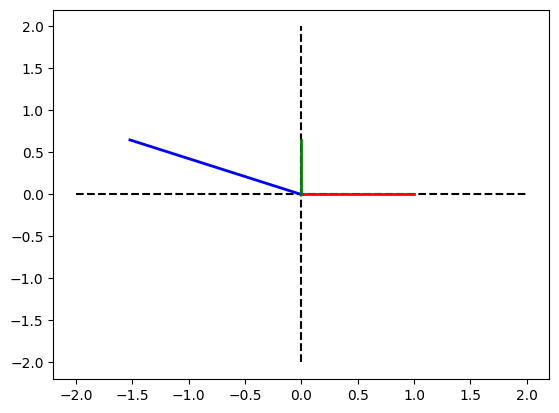

In [28]:
# x = np.array([1,0])
angle = np.sqrt(2)/2
R= np.array([[np.cos(angle), -np.sin(angle)], 
             [np.sin(angle), np.cos(angle)]])

S= np.array([[2,0], [0,1]])
F= np.array([[-1,0], [0,1]])

# W = F
# W= S
W = S.dot(F.dot(R))
x= np.array([1,0])
y= W.dot(x)
neural = np.maximum(0,y)
plt.plot([-2, 2], [0,0], 'k--') #plotting x axis
plt.plot([0,0], [-2, 2], 'k--') #plotting y axis
plt.plot([0,x[0]], [0,x[1]], 'r', linewidth=2) #plotting x vector
plt.plot([0,y[0]], [0,y[1]], 'b', linewidth=2) #plotting y vector
plt.plot([0,neural[0]], [0,neural[1]], 'g', linewidth=2) #plotting neural vector


## 1. Implementing linear regression

First, let's learn a **regression** model to fit some random data that we generate. The simplest model we can you is a linear one:
$$ y = ax + b$$

(np.float64(-5.0), np.float64(5.0), np.float64(-25.0), np.float64(25.0))

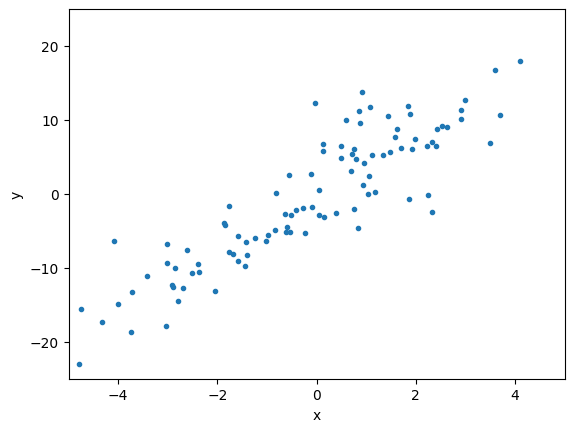

In [3]:
# We know the parameters of our model
a = 3.5
b = -0.5

sdx = 2
x = sdx*np.random.randn(100) # Generate 100 samples from a gaussian distribution with standard deviation 2
noise_level = 4.1
e = noise_level*np.random.randn(len(x)) # Generate some noise (also randomly distributed with stardard deviation 4.1)
y = a*x + b + e # Generate values according to our model

dataset = np.array([x, y]) # Create our dataset

plt.plot(dataset[0,:], dataset[1,:], '.')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-5, 5, -25, 25]) # This fix the size of the axes

Take a look at the previous code and make sure you understand all of it. Make small changes to the different parameters and see how the plot changes. We have just created a dataset to train out model with. Remember that a dataset is a set of pairs:
$(x_i, y_i)$

**Note:** To generate the data we assume that we know $a$ and $b$. But for training we will forget about them


---

*Exercise:* Plot the model for different values of $a$ and $b$ along with the data. Remember, the plot should be a line:

In [ ]:
# Choose a, b

# plot the dataset again

# plot the line y = ax + b (tip, remember to use np.linspace)

**Training our model**
Now we need to find the values of $a$ and $b$ that best fit the model to our data. Remember that we forgot about the correct values. We will do that by minimizing the *Loss function*:

$$ \mathcal{L}( a, b ) =  \sum_i (\hat{y}_i - y_i)^2 $$

by replacing $\hat{y}_i$ with our model, we get:

$$ \mathcal{L}( a, b ) =  \sum_i (a x_i + b  - y_i)^2 $$

This is the *least squares loss*. If we store our parameters in a vector $\mathbf{w} = (a, b)^T$, the problem we need to solve is finding:

$$ \hat{\mathbf{w}} = \underset{\mathbf{w}}{\arg\min} = \mathcal{L}(\mathbf{w})$$
Which can be read as: Finding the set of parameters $\mathbf{w}$ such that the loss is minimum (Make sure this makes sense to you)

In [ ]:
y = dataset[1, :] # first we take the y values from our dataset (the true values)
x = dataset[0, :] # Then the x values we want to use our model with
n = len(x)
Loss = lambda w: np.sum( (w[0]*x + w[1] - y)**2)/n

# Let's pick a w at random:
w = np.array([-2, 1])

print(f"The loss for w = {w} is {Loss(w)}") # Test other values

The loss for w = [-2  1] is 134.12927829210912


*Excercise (advanced)* Plot the 3D plot of the Loss for different conbinations of $w_0$ and $w_1$.

NameError: name 'plt' is not defined

Now we can train our loss with gradient descent. We first compute the derivative of the loss function. We need to compute two partial derivatives because we have two parameters:
$$\frac{\partial \mathcal{L}}{\partial w_0} = 2\sum_i x_i(w_0 x_i + w_1 - y_i)$$
and
$$\frac{\partial \mathcal{L}}{\partial w_1} = 2\sum_i (w_0 x_i + w_1 - y_i)$$

Check this!

So the direction of gradient descent is:

$$\nabla \mathcal{L}(\mathbf{w}) = -\left(\frac{\partial \mathcal{L}}{\partial w_0}, \frac{\partial \mathcal{L}}{\partial w_1}\right)^T$$

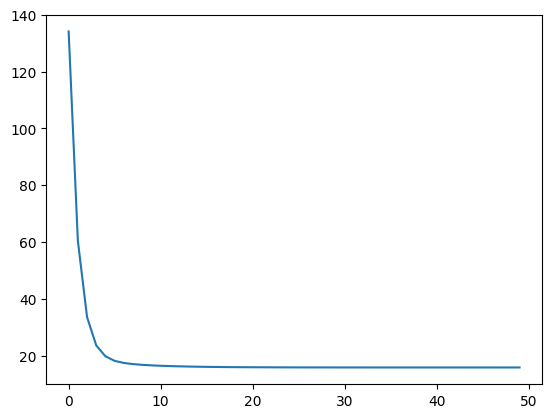

In [ ]:
# Gradient descent: Start from a initial guess
w = np.array([-2, 1])
# Pick a learning rate
learning_rate = 0.05

# Define the partial derivatives as functions
partial_w0 = lambda w: 2*np.sum( x*(w[0]*x + w[1] - y) )/n # Note the elementwise multiplication!
partial_w1 = lambda w: 2*np.sum( w[0]*x + w[1] - y )/n

num_iterations = 50
loss_history = np.zeros(num_iterations)

for i in range(num_iterations):
  loss_history[i] = Loss(w)

  # pick the direction
  gradient = np.array([partial_w0(w), partial_w1(w)])
  dir = -gradient

  # update
  w = w + learning_rate*dir

#plot the loss
plt.plot(loss_history)

Print the learned parameters. How do they compare with our original parameters?

*Exercise* Try decreasing and increasing the noise in the original data. Try different starting points. How does it affect our loss?

*Exercise:* Plot the data and the fitted model, how good is the fit?

*Exercise (Advanced)* Do a *contour plot* of the loss and plot the path of the weights as we do gradient descent.

## 2. Logisting regression




Now, let's give an example of a *classification* task. The simplest model for such problems is *logistic regression*. In this case we, again have a set of pairs $(x_i, y_i)^T$ but in this case, we iterpret $y_i$ as a binary variable:
$y_i = 1$ if $x_i$ belongs to class $1$ or $y_i = 0$ otherwise.

So our model's job is output the **the probability that example $x_i$ belongs to class 1 or class_2**. We call this probabilit the conditional probability of $y_i = 1$ **given** $x_i$.

$$p(y_i = 1 | x_i)$$

In order to compute this probability, we start by computing the **logits**:

$$z_i = \mathbf{w}^Tx_i + \mathbf{b}$$

Then, we compute the probability using the logits:

$$p(y_i = 1 | x_i) = \sigma(z_i) = \frac{1}{1 + \exp(-z_i)}$$

Where $\sigma(x)$ is the sigmoid function we have seen before.

The other probability is $p(y_i = 0 | x_i) = 1 - \sigma(z_i)$ (compute a mathematical definition for this).



Text(0, 0.5, 'x[1]')

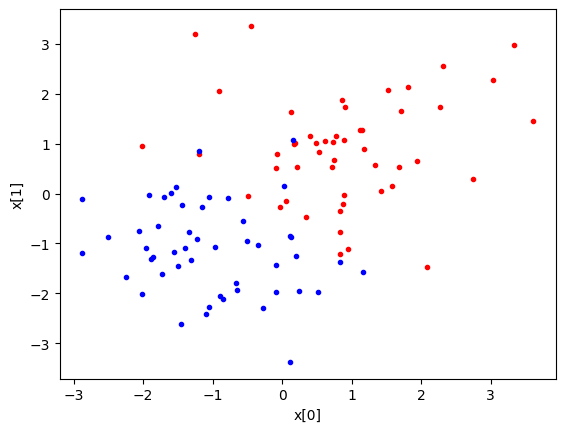

In [ ]:
# Start by simulating some data for class 1
N = 100
mean1 = np.array([[1, 1]]).T
x1 = np.random.randn(2, N//2) + mean1
y1 = np.zeros(x1.shape[1])

mean2 = -mean1
x2 = np.random.randn(2, N//2) + mean2
y2 = np.ones(x2.shape[1])

# store in a datset
dataset = np.hstack((x1, x2))
labels = np.hstack((y1, y2))

plt.plot( x1[0,:], x1[1, :], 'r.')
plt.plot( x2[0,:], x2[1, :], 'b.')
plt.xlabel('x[0]')
plt.ylabel('x[1]')

Make sure you understand the generation process and the functions involved. Change things and print shapes if you are in doubt. Let's now compute some probabilities:

In [ ]:
w = np.array([0.1, 2])
b = 1

logit = lambda x: w.dot(x) + b
sigmoid = lambda x: 1/(1 + np.exp(-logit(x)))

randomInd = 10
x = dataset[:, randomInd] # pick a random datapoint
print( f'The predicted probability P(y = 1|x) for x = {x} is {sigmoid(x)}')
print( f'The predicted probability P(y = 0|x) for x = {x} is {1 - sigmoid(x)}')
print( f'The actual class is: {labels[randomInd]}')

The predicted probability P(y = 1|x) for x = [3.02842779 2.27481631] is 0.9971354501339733
The predicted probability P(y = 0|x) for x = [3.02842779 2.27481631] is 0.002864549866026689
The actual class is: 0.0


*Exercise* Make a plot like the previous one but coloring each datapoint with the predicted class after choosing some **decision threshold**. Say, if $p(y|x) > 0.5$, then class is $1$

In [ ]:
# Your code

**Learning the weights**
We need a loss to apply gradient descent. This loss for a particular preditiction will be given by the cross entropy loss:

$$\mathcal{L}(y, \hat{y}) = -\log p(y|x) = -[y\log \hat{y} + (1+y)\log(1 - \hat{y})]$$

Where $\hat{y} = \sigma(\mathbf{w}x + b)$

The total loss is:

$$\mathcal{L}(\mathbf{\theta}) = \frac{1}{n}\sum_i \mathcal{L}(y_i, \hat{y}_i)$$

*Exercise*
Compute the gradient and do gradient descent to learn a logistic model of our data.
